<a href="https://colab.research.google.com/github/syllerim/nlp-lab/blob/main/NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💬 **NLP – Sentiment Analysis Assignment** 🧐

## 🗄️ **Dependencies** 📦

### Github ai-utils

I've modularized my EDA code into a separate Python package, [`ai-utils`](https://github.com/syllerim/ai-utils), which I cloned and installed locally.  
Now I can easily import and run my EDA pipeline with:


In [1]:
!pip install -r https://raw.githubusercontent.com/syllerim/ai-utils/main/requirements.txt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pyldavis to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [2]:
# clone ai-utils repo, navigate into it, and install it as a local package

!git clone https://github.com/syllerim/ai-utils.git
%cd /content/ai-utils
!pip install .

Cloning into 'ai-utils'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 79 (delta 41), reused 40 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 20.00 KiB | 6.67 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/ai-utils
Processing /content/ai-utils
  Preparing metadata (setup.py) ... done
  Created wheel for ai-utils: filename=ai_utils-0.1.0-py3-none-any.whl size=1149 sha256=2948a4517fdc154ef5ddcbd1ce085d60690290071012c0b81a7da9b3049a8401
  Stored in directory: /root/.cache/pip/wheels/78/a2/84/288924bece8045c6d0d57f4eaf518dd1c73b5f270001ee9735
Successfully built ai-utils


In [3]:
!pip install --force-reinstall numpy
!pip install --force-reinstall scipy scikit-learn pandas
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you ha

In [9]:
# import nlp_modeling_pipeline
# dir(nlp_modeling_pipeline)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'chi2',
 'inspect_review_tfidf',
 'load_and_extract_tokens',
 'load_dataframe_csv',
 'pd',
 'plot_precision_recall_vs_threshold',
 'plot_top_chi2_words',
 'plt',
 'predict_review_sentiment',
 'process_and_save_splits',
 'random',
 'save_dataframe_csv',
 'train_test_split']

In [10]:
%cd /content/ai-utils
from nlp_eda_pipeline import run_eda_pipeline
from nlp_preprocessing_pipeline import run_preprocessing_pipeline, remove_duplicate_reviews
from nlp_modeling_pipeline import load_and_extract_tokens, process_and_save_splits, inspect_review_tfidf, plot_top_chi2_words, plot_precision_recall_vs_threshold, predict_review_sentiment

/content/ai-utils


### Google Drive Paths

In [11]:
#use Google Colab drive
from google.colab import drive

drive.mount('/content/drive/')

# define base directory where the dataset files are stored in Google Drive
DATA_DIR = '/content/drive/MyDrive/KeepCoding/Bootcamp_AI/NLP/Assignment/DataFrames'

# appliances
PATH_APPLIANCES      = f'{DATA_DIR}/df_appliances.csv'
PATH_APPLIANCES_DEV  = f'{DATA_DIR}/df_appliances_dev.csv'
PATH_APPLIANCES_TEST = f'{DATA_DIR}/df_appliances_test.csv'

# fashion
PATH_FASHION         = f'{DATA_DIR}/df_fashion.csv'
PATH_FASHION_DEV     = f'{DATA_DIR}/df_fashion_dev.csv'
PATH_FASHION_TEST    = f'{DATA_DIR}/df_fashion_test.csv'

# software
PATH_SOFTWARE      = f'{DATA_DIR}/df_software.csv'
PATH_SOFTWARE_DEV  = f'{DATA_DIR}/df_software_dev.csv'
PATH_SOFTWARE_TEST = f'{DATA_DIR}/df_software_test.csv'

Mounted at /content/drive/


### Imports

In [12]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pickle
import random
import re
import seaborn as sns
import string
import unicodedata

from collections import Counter

from nltk import download
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud
download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 🗃️ **Download Datasets**

In [13]:
# download amazon datasets
%cd /content/
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_v2/categoryFilesSmall/Software_5.json.gz

/content
--2025-05-04 19:09:11--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288356 (282K) [application/gzip]
Saving to: ‘AMAZON_FASHION_5.json.gz’

AMAZON_FASHION_5.js 100%[===================>] 281.60K   373KB/s    in 0.8s    

2025-05-04 19:09:12 (373 KB/s) - ‘AMAZON_FASHION_5.json.gz’ saved [288356/288356]

--2025-05-04 19:09:12--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75137 (73K) [application/gzip]
Saving to: ‘Appliances_5.json.gz’

Appliances_

## 🧭 **Exploratory Data Analysis** 🧐

In the following steps, I will apply my EDA pipeline to explore and analyze three product review datasets: **Appliances**, **Fashion**, and **Software**.  
This will help uncover patterns in review length, sentiment distribution, vocabulary usage, and more.


### "All appliances" Reviews


--- Dataset loading and preprocessing --- 

First two rows:
 overall  verified  reviewTime     reviewerID       asin                     style  reviewerName                                                                                                                                                    reviewText       summary  unixReviewTime vote image
       5      True 08 22, 2013 A34A1UP40713F8 B00009W3I4 {'Style:': ' Dryer Vent'} James. Backus I like this as a vent as well as something that will keep house warmer in winter.  I sanded it and then painted it the same color as the house.  Looks great. Great product      1377129600  NaN   NaN
       5      True  02 8, 2016 A1AHW6I678O6F2 B00009W3PA      {'Size:': ' 6-Foot'}        kevin.                                                                                                                                                     good item    Five Stars      1454889600  NaN   NaN

Dataset shape: (2277, 12)

- Min review length: 2


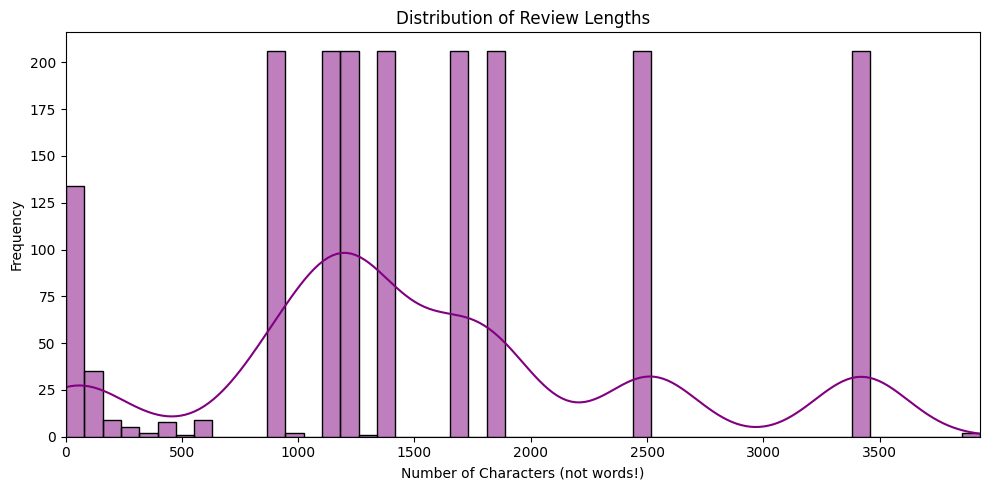


--- Vocabulary creation from tokenized text --- 
Sample tokenized reviews:

0    [i, like, this, as, a, vent, as, well, as, som...
1                                         [good, item]
2                [fit, my, new, lg, dryer, perfectly.]
3                 [good, value, for, electric, dryers]
4              [price, and, delivery, was, excellent.]
Name: reviewText, dtype: object

Flattened list of all tokens (first 20):
0       i
1    like
2    this
3      as
4       a
dtype: object

Vocabulary size: 1731

Top 20 most frequent words:
37994  the
18061  and
16664  i
15570  to
12696  a
10991  of
7507   it
6832   you
6033   in
5977   vent
5223   this
4781   with
4775   or
4758   dryer
4754   out
4592   was
4383   is
3978   for
3958   on
3957   my
3920   lint
3742   that
3547   as
3520   so
3116   your
3105   had
2918   from
2886   rods
2886   rod
2699   if

--- WordCloud to visually highlight the most frequent words in the reviews --- 


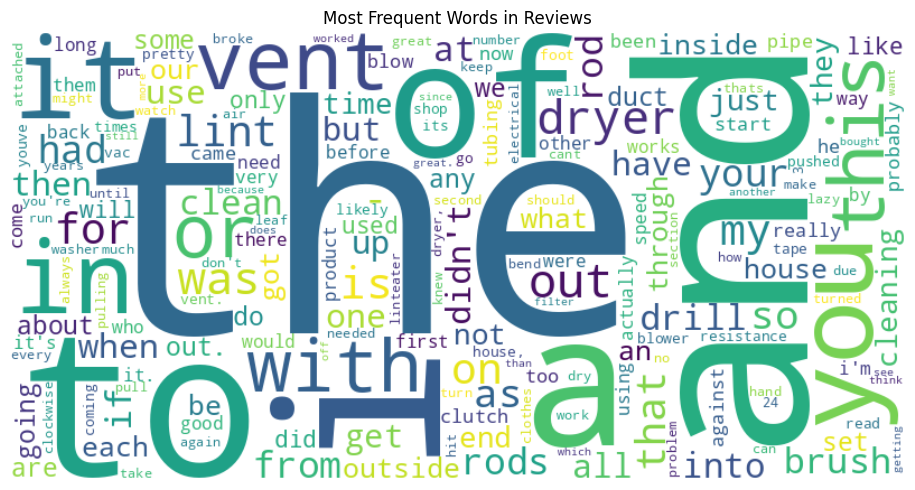


--- Distribution of reviews by sentiment --- 


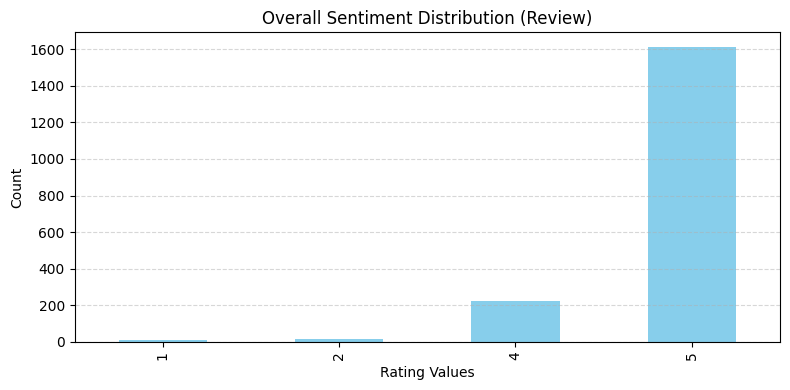

Plotting distribution of review scores (1 to 5, with 3 removed), keeping original score order.

--- Encode sentiment labels based on the 'overall' rating and visualize the class distribution --- 
Encoded 'sentiment_label' column:
                                          reviewText  overall  sentiment_label
0  I like this as a vent as well as something tha...        5                1
1                                          good item        5                1
2                     Fit my new LG dryer perfectly.        5                1
3                     Good value for electric dryers        5                1
4                  Price and delivery was excellent.        5                1




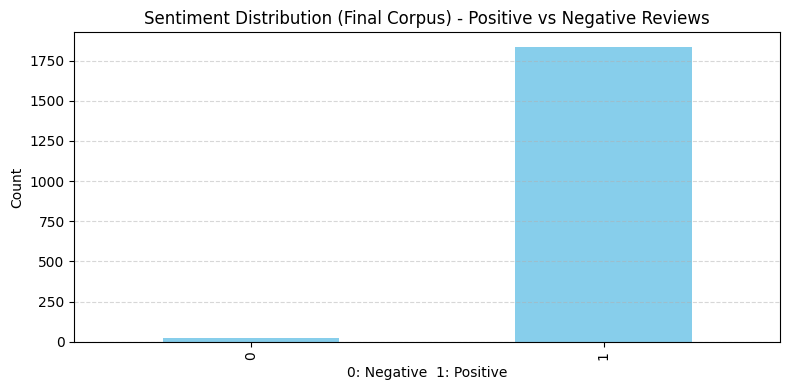

Plotting distribution of review scores (1 to 5, with 3 removed), keeping original score order.

--- Top 10 bigrams --- 
[(('the', 'vent'), 3502), (('of', 'the'), 2695), (('to', 'the'), 2276), (('on', 'the'), 2071), (('the', 'dryer'), 2067), (('if', 'you'), 1855), (('into', 'the'), 1854), (('i', 'had'), 1655), (('in', 'the'), 1653), (('the', 'drill'), 1650)]

Top 10 2-grams:
3502   the vent
2695   of the
2276   to the
2071   on the
2067   the dryer
1855   if you
1854   into the
1655   i had
1653   in the
1650   the drill


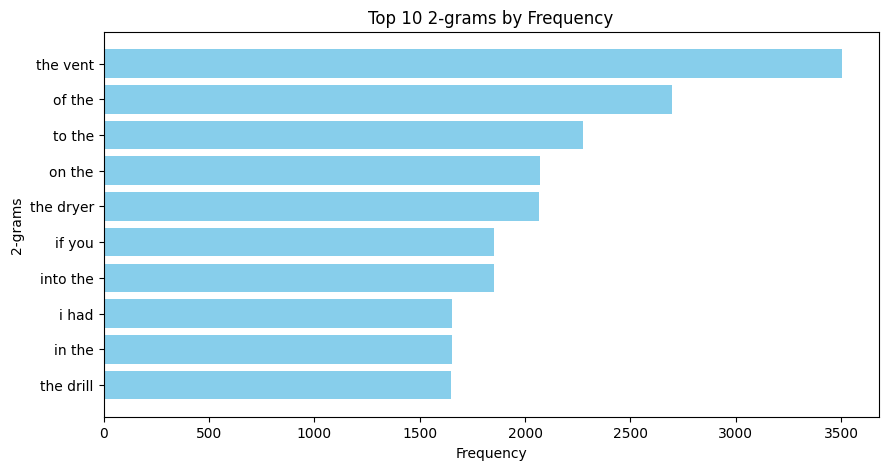


--- Top 10 trigrams --- 
[(('i', 'had', 'to'), 1033), (('the', 'rod', 'and'), 824), (('into', 'the', 'vent'), 824), (('you', 'have', 'a'), 618), (('of', 'the', 'vent'), 618), (('of', 'the', 'house'), 618), (("didn't", 'use', 'a'), 618), (('on', 'the', 'vent'), 618), (('24', 'foot', 'of'), 618), (('had', 'to', 'do'), 414)]

Top 10 3-grams:
1033   i had to
824    the rod and
824    into the vent
618    you have a
618    of the vent
618    of the house
618    didn't use a
618    on the vent
618    24 foot of
414    had to do


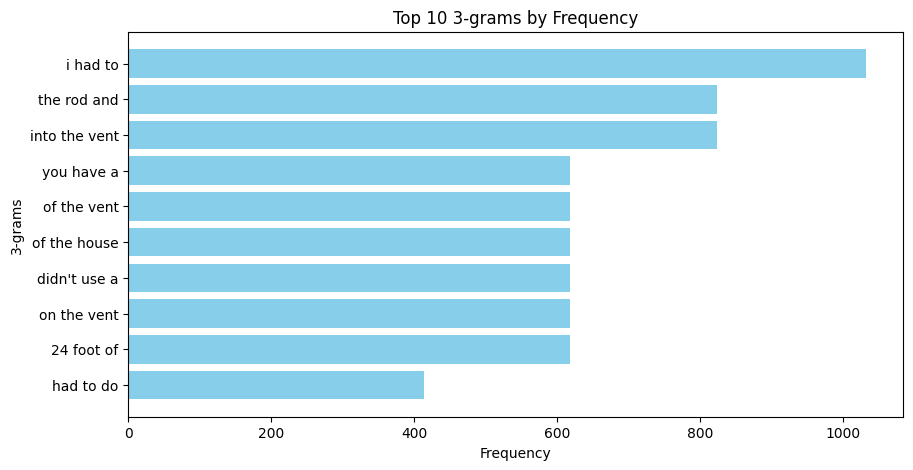

In [14]:
df_appliances, dfa_vocabulary, dfa_words, _, _ = run_eda_pipeline("/content/Appliances_5.json.gz")

### "All Fashion" Reviews


--- Dataset loading and preprocessing --- 

First two rows:
 overall  verified reviewTime    reviewerID       asin                                                             style reviewerName               reviewText    summary  unixReviewTime  vote image
       5      True 09 4, 2015 ALJ66O1Y6SLHA B000K2PJ4K                  {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}     Tonya B. Great product and price! Five Stars      1441324800   NaN   NaN
       5      True 09 4, 2015 ALJ66O1Y6SLHA B000K2PJ4K {'Size:': ' Big Boys', 'Color:': ' Black (37467610) / Red/White'}     Tonya B. Great product and price! Five Stars      1441324800   NaN   NaN

Dataset shape: (3176, 12)

- Min review length: 1
- Max review length: 1366
- Added new column 'reviewLength' with the number of characters in each review.
- Removed reviews with zero or invalid length.
- Filtered dataset to include only relevant columns: overall, reviewText, reviewLength.
- Removed neutral reviews (overall == 3); dataset now

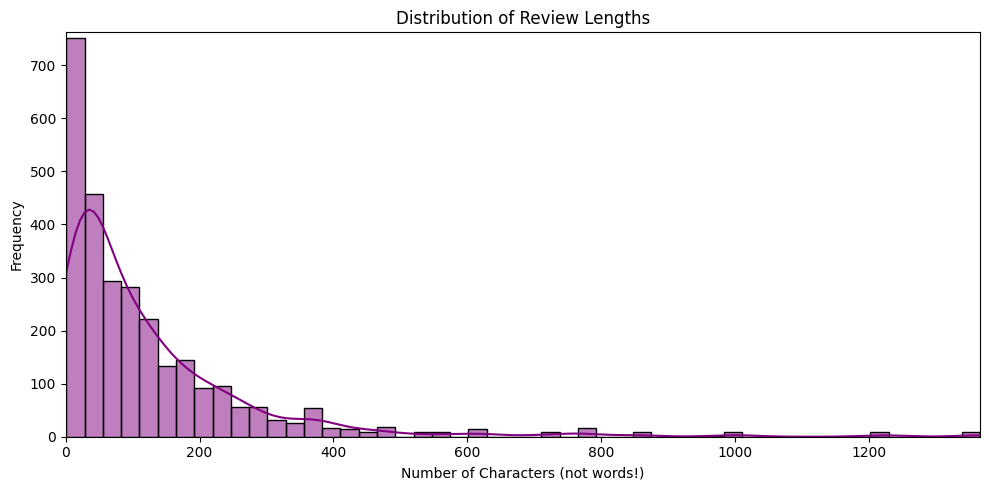


--- Vocabulary creation from tokenized text --- 
Sample tokenized reviews:

0    [great, product, and, price!]
1    [great, product, and, price!]
2    [great, product, and, price!]
3    [great, product, and, price!]
4    [great, product, and, price!]
Name: reviewText, dtype: object

Flattened list of all tokens (first 20):
0      great
1    product
2        and
3     price!
4      great
dtype: object

Vocabulary size: 1870

Top 20 most frequent words:
2868   i
2400   and
2184   the
1519   a
1132   for
1127   these
1124   my
1030   to
1014   are
976    they
786    them
760    very
743    love
728    shoes
705    of
690    in
647    fit
623    is
601    have
590    on
565    so
555    comfortable
491    but
489    great
487    that
468    as
453    this
400    not
394    shoe
393    size

--- WordCloud to visually highlight the most frequent words in the reviews --- 


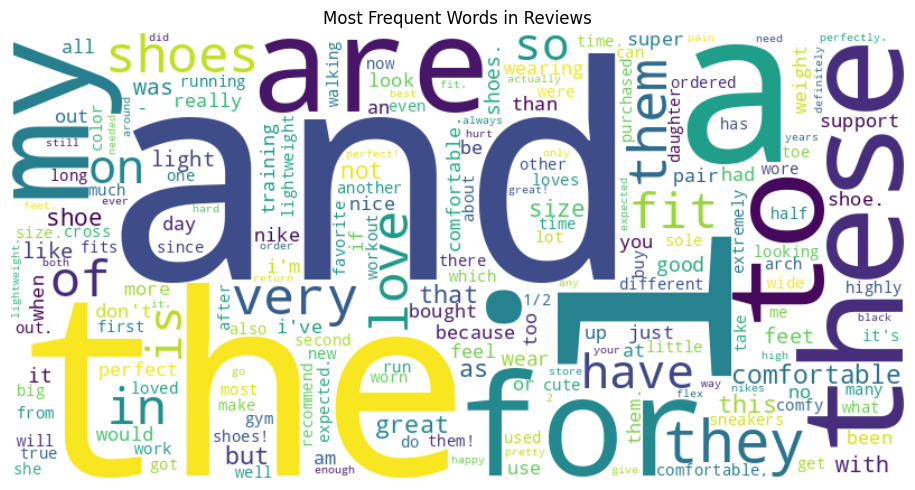


--- Distribution of reviews by sentiment --- 


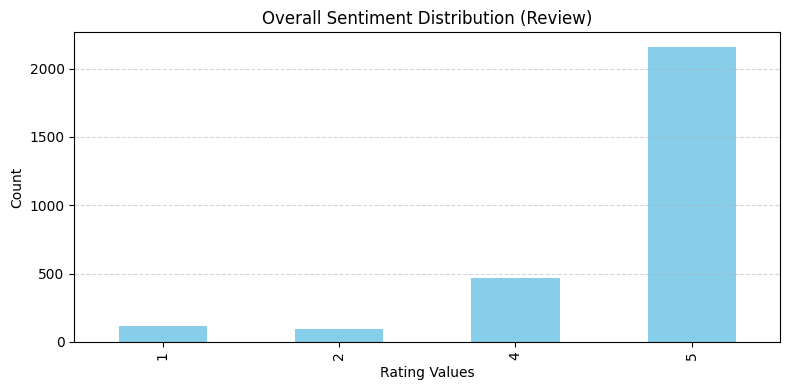

Plotting distribution of review scores (1 to 5, with 3 removed), keeping original score order.

--- Encode sentiment labels based on the 'overall' rating and visualize the class distribution --- 
Encoded 'sentiment_label' column:
                 reviewText  overall  sentiment_label
0  Great product and price!        5                1
1  Great product and price!        5                1
2  Great product and price!        5                1
3  Great product and price!        5                1
4  Great product and price!        5                1




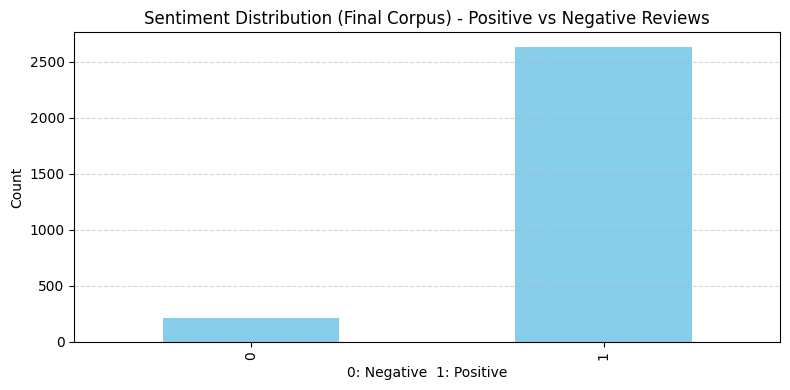

Plotting distribution of review scores (1 to 5, with 3 removed), keeping original score order.

--- Top 10 bigrams --- 
[(('they', 'are'), 454), (('i', 'have'), 295), (('these', 'shoes'), 272), (('and', 'they'), 250), (('love', 'these'), 245), (('i', 'love'), 244), (('my', 'feet'), 222), (('on', 'the'), 201), (('i', 'am'), 179), (('shoes', 'are'), 176)]

Top 10 2-grams:
454    they are
295    i have
272    these shoes
250    and they
245    love these
244    i love
222    my feet
201    on the
179    i am
176    shoes are


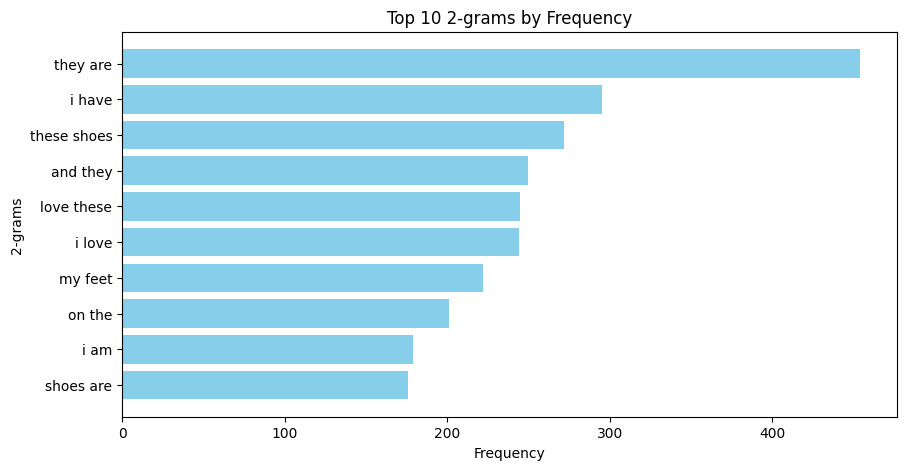


--- Top 10 trigrams --- 
[(('and', 'they', 'are'), 121), (('these', 'shoes', 'are'), 120), (('love', 'these', 'shoes.'), 85), (('i', 'love', 'these'), 73), (('light', 'weight', 'and'), 72), (('they', 'are', 'very'), 62), (('i', 'wore', 'them'), 57), (('and', 'they', 'fit'), 56), (('a', 'lot', 'of'), 54), (('i', 'use', 'them'), 48)]

Top 10 3-grams:
121    and they are
120    these shoes are
85     love these shoes.
73     i love these
72     light weight and
62     they are very
57     i wore them
56     and they fit
54     a lot of
48     i use them


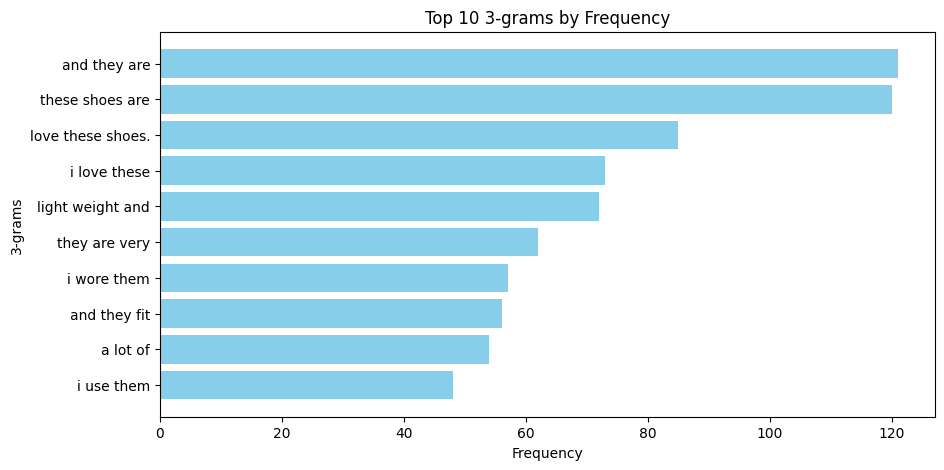

In [15]:
df_fashion, dff_vocabulary, dff_words, _, _ = run_eda_pipeline("/content/AMAZON_FASHION_5.json.gz")

### Software Reviews


--- Dataset loading and preprocessing --- 

First two rows:
 overall  verified  reviewTime     reviewerID       asin                   style reviewerName                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

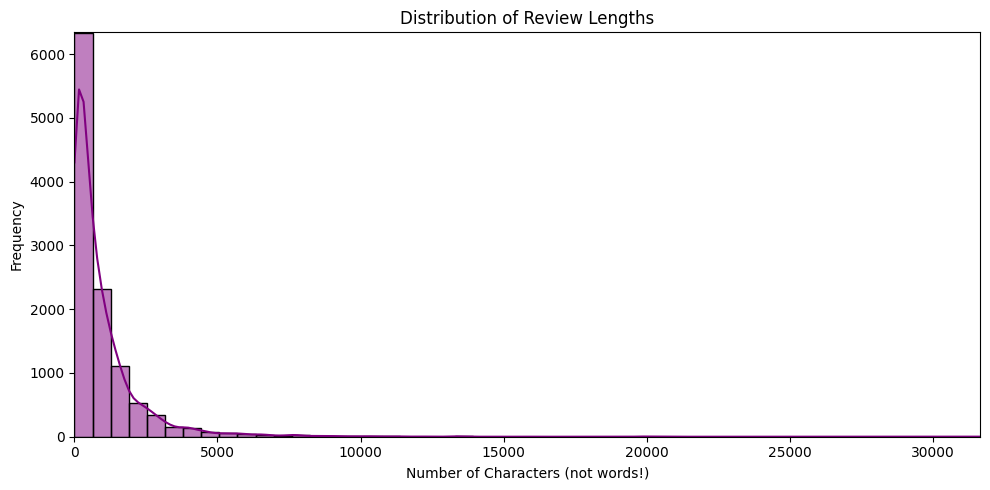


--- Vocabulary creation from tokenized text --- 
Sample tokenized reviews:

0    [i've, been, using, dreamweaver, (and, it's, p...
1    [the, demo, is, done, with, the, pc, version,,...
2    [if, you've, been, wanting, to, learn, how, to...
3    [i've, been, creating, websites, with, dreamwe...
4    [i, decided, (after, trying, a, number, of, ot...
Name: reviewText, dtype: object

Flattened list of all tokens (first 20):
0           i've
1           been
2          using
3    dreamweaver
4           (and
dtype: object

Vocabulary size: 64115

Top 20 most frequent words:
78831  the
58081  to
50807  and
45999  i
45198  a
31683  of
29451  it
28015  is
23697  you
23474  for
21361  that
20204  this
18809  in
17979  with
15353  have
14511  my
13894  on
11560  but
11126  as
10997  not
9923   was
9061   are
8865   be
8559   if
8254   can
8079   or
8036   your
7091   so
6951   software
6831   from

--- WordCloud to visually highlight the most frequent words in the reviews --- 


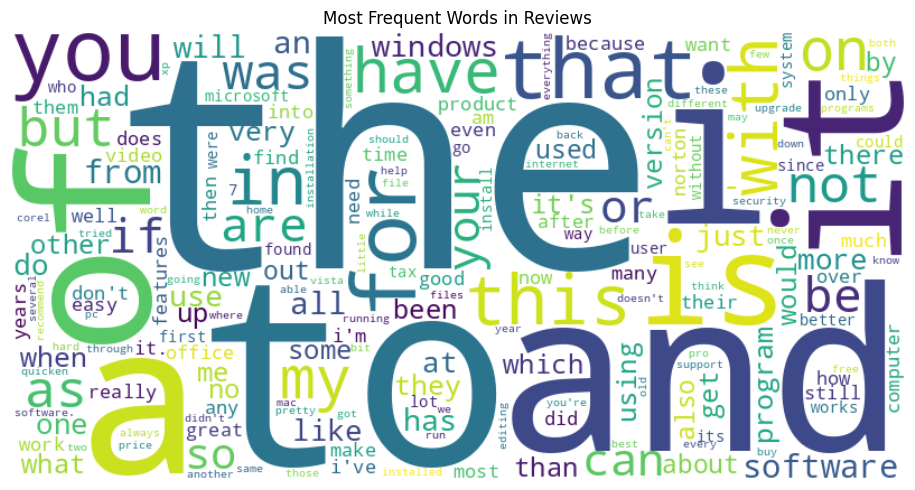


--- Distribution of reviews by sentiment --- 


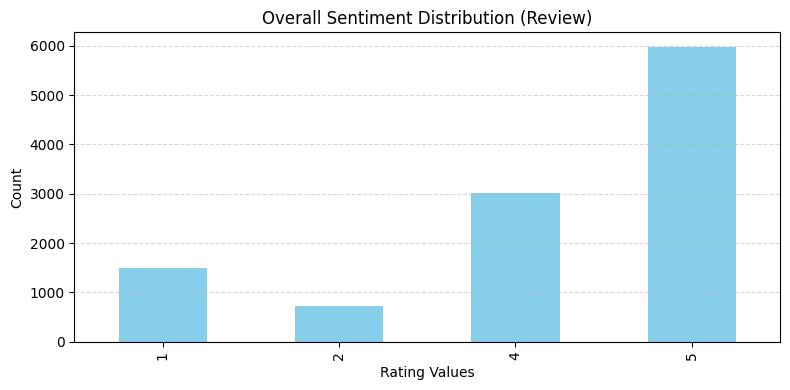

Plotting distribution of review scores (1 to 5, with 3 removed), keeping original score order.

--- Encode sentiment labels based on the 'overall' rating and visualize the class distribution --- 
Encoded 'sentiment_label' column:
                                          reviewText  overall  sentiment_label
0  I've been using Dreamweaver (and it's predeces...        4                1
1  The demo is done with the PC version, with ref...        4                1
2  If you've been wanting to learn how to create ...        5                1
3  I've been creating websites with Dreamweaver f...        5                1
4  I decided (after trying a number of other prod...        5                1




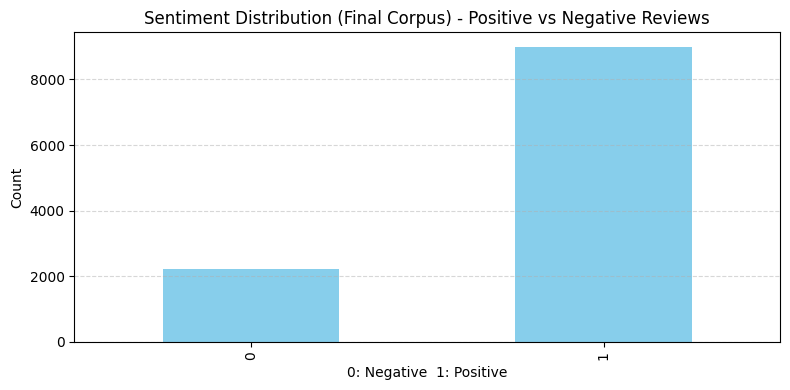

Plotting distribution of review scores (1 to 5, with 3 removed), keeping original score order.

--- Top 10 bigrams --- 
[(('of', 'the'), 6468), (('i', 'have'), 5233), (('in', 'the'), 4657), (('if', 'you'), 4591), (('is', 'a'), 3942), (('you', 'can'), 3650), (('it', 'is'), 3589), (('this', 'is'), 3234), (('to', 'the'), 2978), (('on', 'the'), 2922)]

Top 10 2-grams:
6468   of the
5233   i have
4657   in the
4591   if you
3942   is a
3650   you can
3589   it is
3234   this is
2978   to the
2922   on the


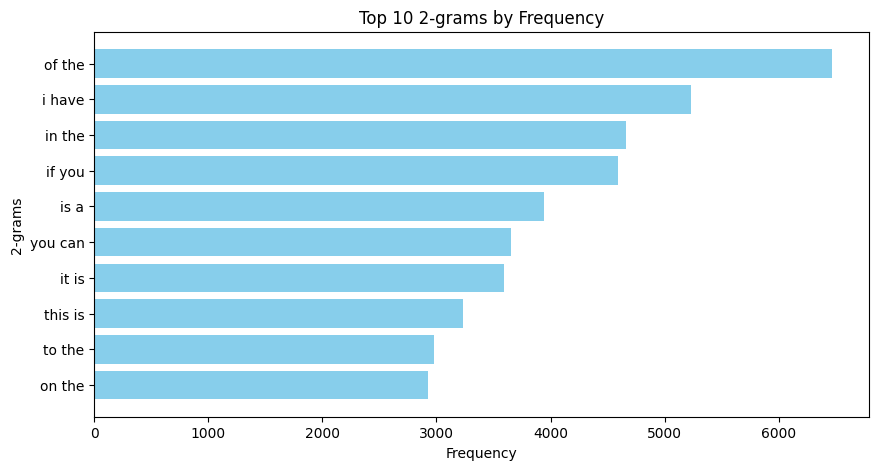


--- Top 10 trigrams --- 
[(('a', 'lot', 'of'), 1287), (('this', 'is', 'a'), 949), (('if', 'you', 'are'), 832), (('if', 'you', 'have'), 770), (('i', 'have', 'been'), 676), (('one', 'of', 'the'), 627), (('i', 'had', 'to'), 564), (('you', 'want', 'to'), 559), (('i', 'have', 'used'), 547), (('you', 'have', 'to'), 518)]

Top 10 3-grams:
1287   a lot of
949    this is a
832    if you are
770    if you have
676    i have been
627    one of the
564    i had to
559    you want to
547    i have used
518    you have to


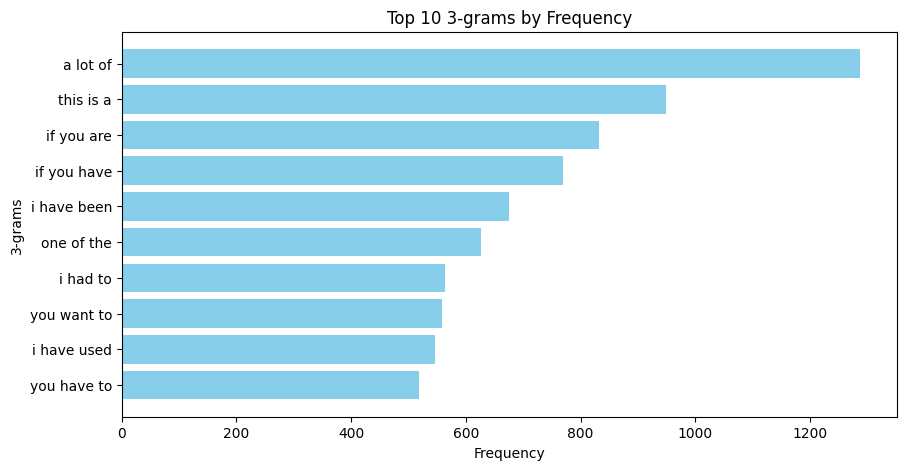

In [16]:
df_software, dfs_vocabulary, dfs_words, _, _ = run_eda_pipeline("/content/Software_5.json.gz")

### 💡 **Conclusions**

> 📊 **Distribution of Reviews**  
> Review lengths vary significantly across the three datasets. While the ***Fashion*** and ***Software*** datasets follow a right-skewed distribution — with most reviews being short and only a few long ones — the ***Appliances*** dataset shows unusual, repetitive spikes at exact character counts with high and nearly identical frequencies, suggesting possible duplicated or templated content. It may be useful to apply length trimming or normalization in subsequent preprocessing stages.

> 🔤 **Vocabulary**  
> Although some reviews are long, the vocabulary is quite limited in the ***Appliances*** and ***Fashion*** datasets (1,731 and 1,870 unique words, respectively). The ***Software*** dataset is richer, with around 64,000 unique words. Overall, the relatively small vocabulary sizes suggest high repetition and low lexical variety.

> ☁️ **Word Cloud**  
> The word clouds are dominated by common stopwords (e.g., "the", "and", "to", "a"), which adds noise and makes it harder to identify meaningful patterns in the data.

> 🧠 **My Takes**  
> - 👉 The datasets are highly imbalanced, with most reviews being positive. This could potentially bias any model trained on them. One option would be to apply balancing techniques before training. For now, I'll proceed with the imbalanced data, but if time allows, I may revisit the analysis using balanced datasets.  
> - 👉 I will remove stopwords during preprocessing to better surface the most relevant terms used in the reviews.


## 🧹 **Preprocessing** 🧼

The result of the previous EDA steps contains contractions (e.g. i've, it's, etc), punctuations, possibly numbers and symbols, so it's not clean yet.
  
In this section I will clean the raw review texts to ensure a more meaningful and consistent vocabulary for downstream analysis by:
* Sentence normalization
* Tokenization
* Stopword removal
* Punctuation & number removal
* Stemming
* Removal of repetitions
* Remove very short tokens (e.g. length ≤ 2)
* Remove unwanted fragments (e.g. {'co', 'com', 'www', 'htt', 'th'}),
* Rebuilding the vocabulary with cleaned words.

### All appliances Reviews

In [17]:
df_appliances, tokenized_reviews_appliances, clean_flattened_tokens_appliances = run_preprocessing_pipeline(df_appliances)

🧹 Starting preprocessing of reviews...

- Tokenization and preprocessing complete.

- Flattened all tokens — total tokens: 226919

- Stored cleaned tokens in column 'cleaned_tokens'.

- Removed 1736 duplicate reviews.


In [18]:
df_appliances.shape

(120, 5)

In [19]:
df_appliances.head(5)

,overall,reviewText,reviewLength,sentiment_label,cleaned_tokens
0,5,I like this as a vent as well as something tha...,157,1,"[like, vent, well, someth, keep, hous, warmer,..."
1,5,good item,9,1,"[good, item]"
2,5,Fit my new LG dryer perfectly.,30,1,"[fit, new, dryer]"
3,5,Good value for electric dryers,30,1,"[good, valu, electr, dryer]"
4,5,Price and delivery was excellent.,33,1,"[price, deliveri]"


In [20]:
# rebuild the clean vocabulary

vocab_appliances = Counter(clean_flattened_tokens_appliances)
print(f"Vocabulary size: {len(set(clean_flattened_tokens_appliances))}")
print(f"\nVocabulary size: {len(vocab_appliances)}\n")
print("Top 20 most frequent words:")
for word, freq in vocab_appliances.most_common(30):
  print(f"{freq:<5}  {word}")

Vocabulary size: 845

Vocabulary size: 845

Top 20 most frequent words:
5977   vent
5772   rod
4759   dryer
4536   clean
4177   use
3920   lint
2890   drill
2697   get
2682   brush
2486   time
2310   work
2299   one
2072   come
2060   end
1877   like
1457   need
1453   got
1447   set
1446   clutch
1445   turn
1444   dri
1443   hous
1443   insid
1442   tape
1442   pull
1442   push
1442   outsid
1240   go
1238   attach
1236   duct


### All Fashion Reviews

In [21]:
df_fashion, tokenized_reviews_fashion, clean_flattened_tokens_fashion = run_preprocessing_pipeline(df_fashion)

🧹 Starting preprocessing of reviews...

- Tokenization and preprocessing complete.

- Flattened all tokens — total tokens: 25733

- Stored cleaned tokens in column 'cleaned_tokens'.

- Removed 2490 duplicate reviews.


In [22]:
df_fashion.shape

(349, 5)

In [23]:
df_fashion.head(5)

,overall,reviewText,reviewLength,sentiment_label,cleaned_tokens
0,5,Great product and price!,24,1,"[great, product]"
1,5,Stays vibrant after many washes,31,1,"[stay, vibrant, mani, wash]"
2,5,My son really likes the pink. Ones which I was...,60,1,"[son, realli, like, one, nervou]"
3,2,Relieved my Plantar Fascitis for 3 Days. Then ...,130,0,"[reliev, plantar, fasciti, unbear, pain, retur..."
4,2,This is my 6th pair and they are the best thin...,348,0,"[pair, best, thing, ever, plantar, fasciiti, r..."


In [24]:
# rebuild the clean vocabulary

vocab_fashion = Counter(clean_flattened_tokens_fashion)
print(f"Vocabulary size: {len(set(clean_flattened_tokens_fashion))}")
print(f"\nVocabulary size: {len(vocab_fashion)}\n")
print("Top 20 most frequent words:")
for word, freq in vocab_fashion.most_common(30):
  print(f"{freq:<5}  {word}")

Vocabulary size: 837

Vocabulary size: 837

Top 20 most frequent words:
1122   shoe
950    love
728    fit
611    comfort
489    great
466    wear
426    size
385    like
342    feet
336    light
333    look
298    pair
295    good
270    use
265    run
239    nike
230    feel
229    realli
199    nice
199    perfect
195    work
194    would
186    order
175    day
169    super
160    support
153    weight
153    color
146    bought
142    toe


### Software Reviews

In [25]:
df_software, tokenized_reviews_software, clean_flattened_tokens_software = run_preprocessing_pipeline(df_software)

🧹 Starting preprocessing of reviews...

- Tokenization and preprocessing complete.

- Flattened all tokens — total tokens: 727703

- Stored cleaned tokens in column 'cleaned_tokens'.

- Removed 2298 duplicate reviews.


In [26]:
df_software.shape

(8909, 5)

In [27]:
df_software.head(5)

,overall,reviewText,reviewLength,sentiment_label,cleaned_tokens
0,4,I've been using Dreamweaver (and it's predeces...,1237,1,"[use, dreamweav, predecessor, mani, someon, ex..."
1,4,"The demo is done with the PC version, with ref...",2439,1,"[demo, done, refer, mac, version, video, set, ..."
2,5,If you've been wanting to learn how to create ...,8410,1,"[want, learn, creat, either, lack, confid, aff..."
3,5,I've been creating websites with Dreamweaver f...,2475,1,"[creat, websit, dreamweav, year, experi, taugh..."
4,5,I decided (after trying a number of other prod...,1188,1,"[decid, tri, number, switch, gold, standard, w..."


In [28]:
# rebuild the clean vocabulary

vocab_software = Counter(clean_flattened_tokens_software)
print(f"Vocabulary size: {len(set(clean_flattened_tokens_software))}")
print(f"\nVocabulary size: {len(vocab_software)}\n")
print("Top 20 most frequent words:")
for word, freq in vocab_software.most_common(30):
  print(f"{freq:<5}  {word}")

Vocabulary size: 12194

Vocabulary size: 12194

Top 20 most frequent words:
14080  use
6967   softwar
6258   program
6236   window
5950   like
5811   work
5638   get
5550   instal
5451   one
5060   version
4432   product
4234   need
3885   make
3862   time
3831   new
3819   would
3620   comput
3590   year
3548   also
3445   want
3192   run
3190   featur
3176   file
3157   good
3075   even
3048   easi
2976   tri
2946   user
2934   much
2845   video


### 💡 **Conclusions**

> 📘 **Insights:** After running the preprocessing pipeline, all three datasets were reduced in size. However, while the ***Appliances*** and ***Fashion*** datasets dropped significantly (to around 120 and 350 rows respectively after removing duplicate reviews), the ***Software*** dataset retained **8,917** cleaned and usable reviews.  
> This makes the ***Software*** dataset the most robust source for further analysis, model building, insight extraction, or any NLP experiments, thanks to its much larger volume of meaningful data.

> 🧠 **My Take:**
* 👉 For the next section, I'll focus on working with the ***Software*** dataset for modeling. If time allows, I might also experiment with the other two, just to explore their behavior.


## 🏗️ **Split Metadata into Development / Test** 🏠

In case I have more time I will move this methods to my github repo for utils `ai-utils` linked above.

In [29]:
# run the full save and split pipeline for software, fashion, and appliances datasets

# process_and_save_splits(df_appliances, "Appliances", PATH_APPLIANCES, PATH_APPLIANCES_DEV, PATH_APPLIANCES_TEST)
# process_and_save_splits(df_fashion, "Fashion", PATH_FASHION, PATH_FASHION_DEV, PATH_FASHION_TEST)
process_and_save_splits(df_software, "Software", PATH_SOFTWARE, PATH_SOFTWARE_DEV, PATH_SOFTWARE_TEST)


📁 Processing dataset: Software
DataFrame with shape: (8909, 5) saved to: /content/drive/MyDrive/KeepCoding/Bootcamp_AI/NLP/Assignment/DataFrames/df_software.csv
Software train shape: (6681, 5), test shape: (2228, 5)
DataFrame with shape: (6681, 5) saved to: /content/drive/MyDrive/KeepCoding/Bootcamp_AI/NLP/Assignment/DataFrames/df_software_dev.csv
DataFrame with shape: (2228, 5) saved to: /content/drive/MyDrive/KeepCoding/Bootcamp_AI/NLP/Assignment/DataFrames/df_software_test.csv


🏋️ **Train Splits** 🗂️

In [30]:
# load the software train dataset saved on disk and get X and y

df_software_train, X_software_train, y_software_train = load_and_extract_tokens(
    PATH_SOFTWARE_DEV,
    'cleaned_tokens',
    'sentiment_label'
)

DataFrame loaded from: /content/drive/MyDrive/KeepCoding/Bootcamp_AI/NLP/Assignment/DataFrames/df_software_dev.csv with shape: (6681, 5)

Preview of features (cleaned_tokens):
0    ['use', 'never', 'viru', 'sinc', 'start', 'use...
1    ['high', 'expect', 'happi', 'say', 'met', 'def...
2    ['turbo', 'tax', 'came', 'nice', 'probli', 'us...
3    ['best', 'tax', 'prep', 'softwar', 'market', '...
4    ['success', 'version', 'increment', 'user', 'f...
Name: cleaned_tokens, dtype: object

Preview of labels (sentiment_label):
0    1
1    1
2    1
3    1
4    1
Name: sentiment_label, dtype: int64


🧪 **Test Splits** 🗂️

In [31]:
# load the software train dataset saved on disk and get X and y

df_software_test, X_software_test, y_software_test = load_and_extract_tokens(
    PATH_SOFTWARE_TEST,
    'cleaned_tokens',
    'sentiment_label'
)

DataFrame loaded from: /content/drive/MyDrive/KeepCoding/Bootcamp_AI/NLP/Assignment/DataFrames/df_software_test.csv with shape: (2228, 5)

Preview of features (cleaned_tokens):
0    ['power', 'capabl', 'softwar', 'run', 'close',...
1    ['begin', 'first', 'experi', 'window', 'two', ...
2    ['acroni', 'true', 'imag', 'simpli', 'mine', '...
3    ['face', 'lot', 'instruct', 'plain', 'lame', '...
4                                  ['differ', 'great']
Name: cleaned_tokens, dtype: object

Preview of labels (sentiment_label):
0    1
1    1
2    0
3    1
4    1
Name: sentiment_label, dtype: int64


This is a good point to check class balance

In [32]:
print("Class distribution (counts):")
print(y_software_train.value_counts())

print("\nClass distribution (percentage):")
print(y_software_train.value_counts(normalize=True).round(3))


Class distribution (counts):
sentiment_label
1    5302
0    1379
Name: count, dtype: int64

Class distribution (percentage):
sentiment_label
1    0.794
0    0.206
Name: proportion, dtype: float64


### 💡 **Conclusions**

> 🚨 This is a heavily imbalanced dataset:
- **~20.6%** are negative (0)
- **~79.4%** of your training labels are positive (1)

> The consequences are:
- The model might be bias toward predicting positives
- Might get high accuracy even if negative reviews are being misclassified often.

> 🧠 **My Take**:   
* 👉 When training model make sure to set the parameter `class_weight='balanced'` and compare results.



## 🧠 **Modeling and Metrics** 🤖

### Feature Extraction with TF-IDF


To transform the preprocessed text into numerical features, I'll use **TF-IDF (Term Frequency - Inverse Document Frequency)**, which weighs the importance of a term in a document relative to how common it is in the entire corpus.

This setup helps keep things simple and efficient, which is important since working with limited data and resources.


The configuration I'm using is the following:

- `max_df=0.95`: This excludes very common terms that appear in more than 95% of the documents, since they most likely contain irrelevant info.
- `min_df=5`: Only keeps words that appear in at least 5 documents, which helps remove noise.
- `max_features=3000`: Limits the vocabulary size to the top 3000 terms by importance, helping control dimensionality and memory usage.
- `strip_accents='ascii'`: Clean up accents, turning words like “café” into “cafe”.
- `ngram_range=(1, 2)`: picks up unigrams and bigrams to add a bit more context without adding too much overhead.

In [33]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=3000,
    strip_accents='ascii',
    ngram_range=(1, 2)
)
tfidf_vectorizer.fit(X_software_train)

TfidfVectorizer(max_df=0.95, max_features=3000, min_df=5, ngram_range=(1, 2),
                strip_accents='ascii')

In [34]:
# check the total number of unique tokens kept in the TF-IDF vocabulary
len(tfidf_vectorizer.vocabulary_)

3000

In [35]:
# print the first 20 vocabulary items
for word, index in list(tfidf_vectorizer.vocabulary_.items())[:20]:
    print(f"{index:<5}  {word}")

2659   use
1547   never
2798   viru
2219   sinc
2357   start
2264   softwar
2361   start use
2708   use softwar
1046   high
750    expect
1019   happi
2119   say
1445   met
525    definit
1624   one
1551   new
958    go
2344   split
2065   review
557    differ


#### TF-IDF scores del training set y test set

In [36]:
X_software_train_tfidf = tfidf_vectorizer.transform(X_software_train)
X_software_test_tfidf = tfidf_vectorizer.transform(X_software_test)

In [37]:
# score IDF of some words

words_example = [
    'software',
    'bug',
    'error',
    'tutorial',
    'install',
    'update',
    'crash',
    'good',
    'bad',
    'co',       # invalid already filtered lengths
    'amazing',
    'horrible',
    'invalidword'
]

vocab_idf = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

print(f"{'Word':20}{'IDF':>10}")
for word in words_example:
    if word not in vocab_idf:
        print(f"{word:20}{'OOV':>10}")
    else:
        print(f"{word:20}{vocab_idf[word]:>10.3f}")


Word                       IDF
software                   OOV
bug                      4.631
error                    4.451
tutorial                   OOV
install                    OOV
update                     OOV
crash                    4.227
good                     2.476
bad                      4.117
co                         OOV
amazing                    OOV
horrible                   OOV
invalidword                OOV


#### Words with TF-IDF in a random review from the training dataset

In [38]:
## walabras with TF-IDF in a review
inspect_review_tfidf(
    X_tokens=X_software_train,
    y_labels=y_software_train,
    X_tfidf=X_software_train_tfidf,
    vectorizer=tfidf_vectorizer
)


📝 Review ID: 2856
Sentiment: positive
Review tokens: ['like', 'abl', 'report', 'actual', 'protect', 'way', 'know', 'far', 'instal', 'though', 'requir', 'creation', 'norton', 'account', 'alreadi', 'enter', 'product', 'key', 'download', 'easi', 'option', 'detect', 'hot', 'spot', 'automat', 'perfectli', 'boot', 'two', 'product', 'best', 'best', 'see', 'anyth', 'make', 'stand', 'plu', 'simpli', 'know', 'well', 'hot', 'spot', 'guarante', 'someon', 'attempt', 'harm', 'comput', 'steal', 'also', 'find', 'noth', 'wrong']

🔝 Top 10 words with highest TF-IDF:
                   tfidf
hot             0.390457
spot            0.347575
norton account  0.199490
enter product   0.191512
like abl        0.187198
best            0.186860
guarante        0.180913
know            0.176527
product key     0.173787
stand           0.166552

🔻 Top 10 words with lowest (non-zero) TF-IDF:
             tfidf
download  0.088263
way       0.083423
well      0.082891
find      0.081301
comput    0.074710
easi    

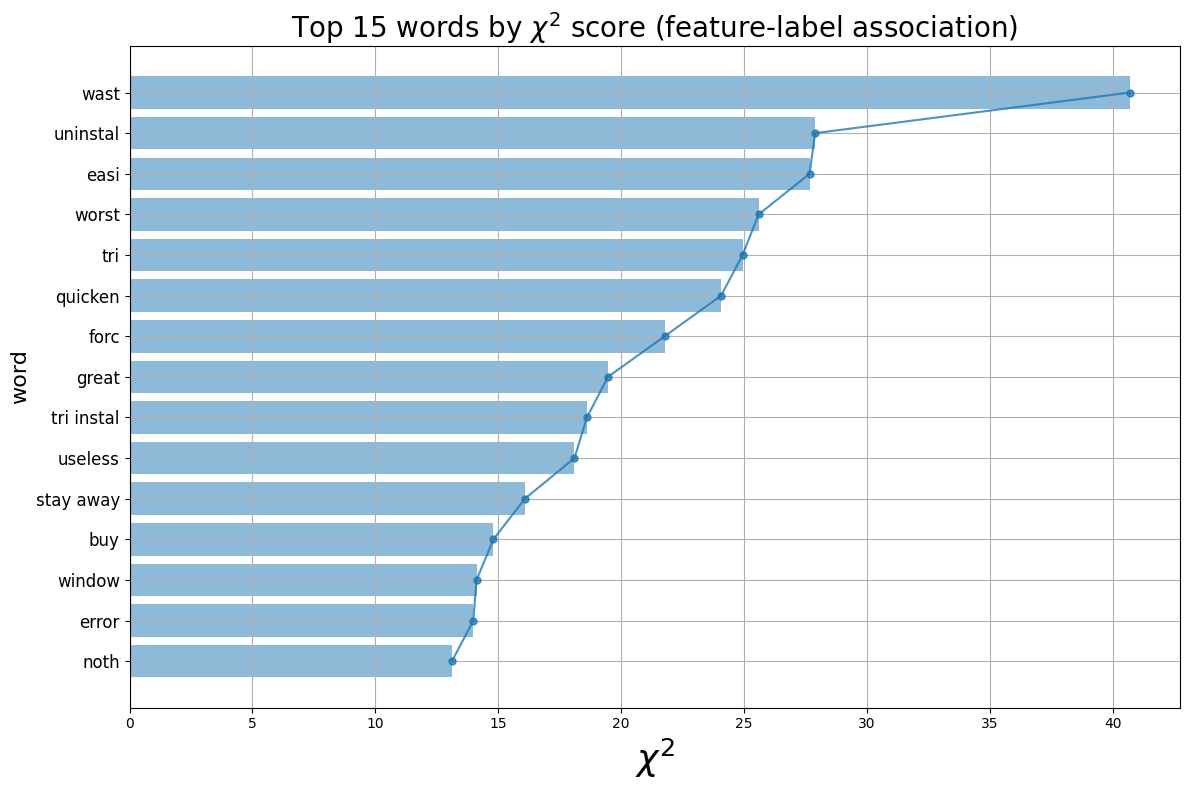

In [39]:
# compute and plot the top N words with the highest Chi-squared score

plot_top_chi2_words(X_software_train_tfidf, y_software_train, tfidf_vectorizer, top_n=15)

### GridSearchCV with Logistic Regression

In [40]:
#  tune hyperparameters

alpha_vector = np.logspace(-3, 3, 10) # from 10^(-3) to 10^3 in 10 values
param_grid = { 'C': alpha_vector }

model_1 = GridSearchCV(
    LogisticRegression(
        max_iter=500
    ),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

model_1.fit(X_software_train_tfidf, y_software_train)

print("Best C:", model_1.best_params_['C'])
print("Best CV accuracy:", model_1.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best C: 10.0
Best CV accuracy: 0.8690313464320424


🔂 Let's try one more time with param `class_weight='balanced'` considering that the dataset is highly imbalanced

In [41]:
param_grid = { 'C': np.logspace(-3, 3, 10) } # from 10^(-3) to 10^3 in 10 values

model_2 = GridSearchCV(
    LogisticRegression(
        class_weight='balanced',
        max_iter=500
    ),
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    verbose=2
)

model_2.fit(X_software_train_tfidf, y_software_train)

print("Best C:", model_2.best_params_['C'])
print("Best CV accuracy:", model_2.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................C=0.004641588833612777; total time=   0.0s
[CV] END .............................C=0.004641588833612777; total time=   0.0s
[CV] END .............................C=0.004641588833612777; total time=   0.0s
[CV] END .............................C=0.004641588833612777; total time=   0.0s
[CV] END .............................C=0.004641588833612777; total time=   0.0s
[CV] END .............................C=0.021544346900318832; total time=   0.0s
[CV] END .............................C=0.021544

💾 Save the full GridSearchCV object (includes estimator, best params, CV results, etc) and training history as a dict

In [42]:
with open("model_2_gridsearch.pkl", "wb") as f:
    pickle.dump(model_2, f)

with open("model_2_best_estimator.pkl", "wb") as f:
    pickle.dump(model_2.best_estimator_, f)

history = {
    "best_params": model_2.best_params_,
    "best_score": model_2.best_score_,
    "cv_results": model_2.cv_results_
}

with open("model_2_history.pkl", "wb") as f:
    pickle.dump(history, f)

#### 📐 Evaluate the prediction model

In [43]:
# get best model from grid search
best_model = model_2.best_estimator_

# make predictions on test set
y_pred = best_model.predict(X_software_test_tfidf)

# print evaluation results
print('Confusion matrix:\n{}'.format(confusion_matrix(y_software_test, y_pred)))
print('\nClassification report:\n{}'.format(
    classification_report(y_software_test, y_pred, target_names=['negative', 'positive']))
)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_software_test, y_pred)))

Confusion matrix:
[[ 368   90]
 [ 222 1548]]

Classification report:
              precision    recall  f1-score   support

    negative       0.62      0.80      0.70       458
    positive       0.95      0.87      0.91      1770

    accuracy                           0.86      2228
   macro avg       0.78      0.84      0.81      2228
weighted avg       0.88      0.86      0.87      2228

Accuracy score: 0.8600


##### 💡 **Conclusions**

> The model is doing a good job overall.

> For positives reviews it correctly identifies 1548 out of 1770 positive reviews, which gives it a recall of 0.87 and a precision of 0.95 for that class.

> For negative reviews, it gets 368 out of 458 right, with a recall of 0.80, but the precision drops to 0.62.

> So while it's reliable for positives, there's still room to improve on how precisely it handles negative since there is a significant number of false positives.



#### 📉 Plot performance vs complexity (C)

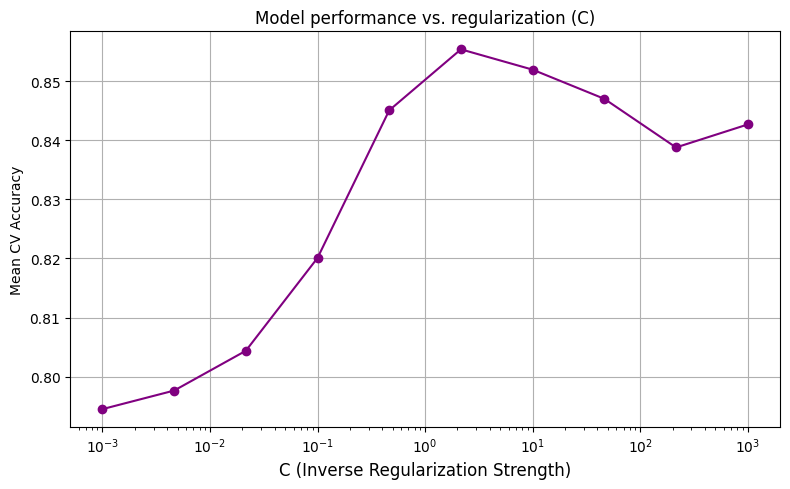

In [44]:
# visualize performance vs complexity
import numpy as np
import matplotlib.pyplot as plt

# extract mean accuracy from grid search results
scores = np.array(model_2.cv_results_['mean_test_score'])
c_values = model_2.cv_results_['param_C'].data  # extract C values used in GridSearchCV

# plot
plt.figure(figsize=(8, 5))
plt.semilogx(c_values, scores, '-o', label='CV Accuracy', color='purple')
plt.xlabel('C (Inverse Regularization Strength)', fontsize=12)
plt.ylabel('Mean CV Accuracy')
plt.title('Model performance vs. regularization (C)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 💡 **Conclusions**

> As the value of C increases, the model accuracy improves, reaching its peak around C = 10. Beyond that point, accuracy starts to decline, suggesting potential overfitting. So, C = 10 is selected as the optimal regularization value.

> **TODO:** If I have more time I would like to balance the dataset and see the changes in results.

#### 📈 Plot Accuracy evolution

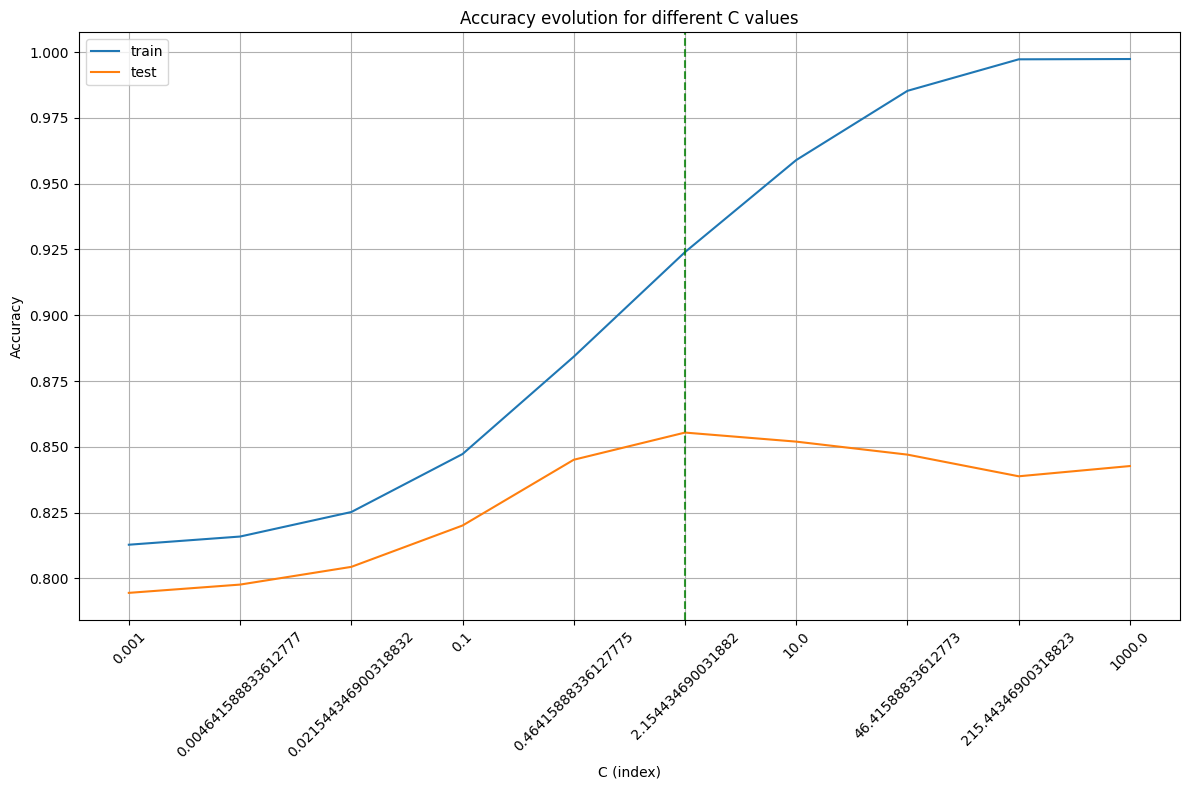

In [45]:
# get train and test scores from grid results
train_acc = model_2.cv_results_['mean_train_score']
test_acc = model_2.cv_results_['mean_test_score']
c_params = model_2.cv_results_['param_C'].data

# plot
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)

plt.title('Accuracy evolution for different C values')
plt.xlabel('C (index)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# show C values as x-ticks
plt.xticks(ticks=range(len(c_params)), labels=c_params, rotation=45)

plt.tight_layout()
plt.show()

##### 💡 **Conclusions**

> The optimal C value is approximately 2.15 and offers the best balance between model capacity and generalization. At higher C values, although training accuracy continues to increase, testing accuracy decreases which means the model memorizes the data and doesn't generalize well, indicating overfitting. With very small C values, the model doesn't learn enough (underfitting).

#### 📉 Plot Precision and Recall Scores

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")

    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

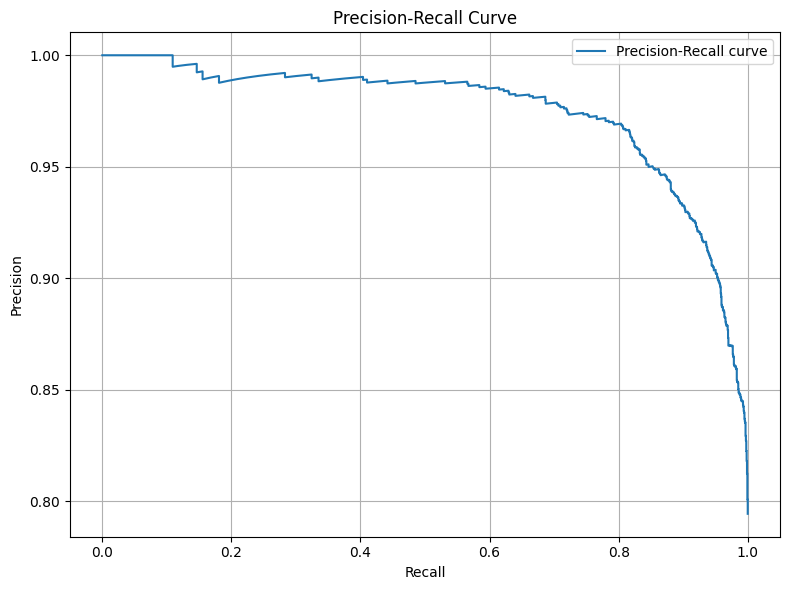

In [47]:
# get the best model
best_model = model_2.best_estimator_

# evaluate how confident the model is that a sample is positive
y_scores = best_model.predict_proba(X_software_test_tfidf)[:, 1]

# compute precision-recall curve
p, r, thresholds = precision_recall_curve(y_software_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(r, p, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#####💡 **Conclusions**

> The precision-recall curve shows that the model maintains high precision across a wide range of recall values (a good indicator of consistent performance). Only when it tries to catch almost all positives (very high recall) is when precision drops more noticeably.

#### 📈 Precision and Recall Scores as a function of the decision threshold

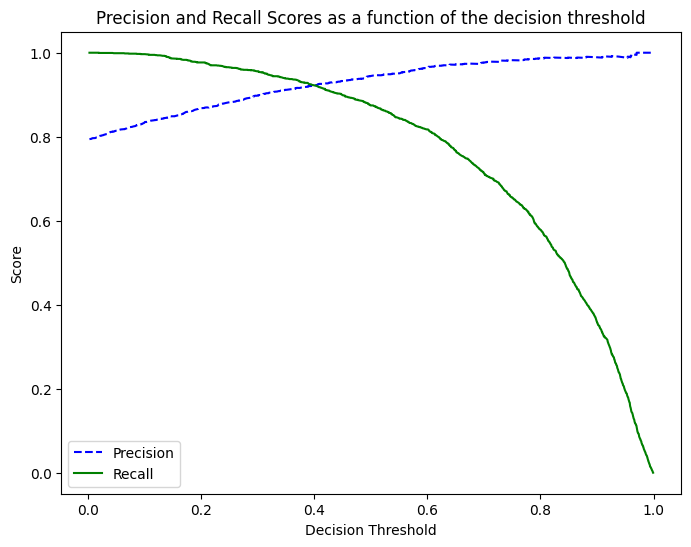

In [48]:
plot_precision_recall_vs_threshold(p, r, thresholds)

##### 💡 **Conclusions**

> This plot shows how precision and recall change depending on the decision threshold. As expected, precision increases when the threshold is higher, but recall drops sharply since fewer positive samples are detected. The sweet spot is usually somewhere in the middle.

#### 🎯 Predict

In [49]:
# test on 5 random samples
for i in random.sample(range(0, len(df_software_test)), 5):
    print(f'\n🔎 Review #{i}')
    predict_review_sentiment(i, df_software_test, model_2.best_estimator_, tfidf_vectorizer)



🔎 Review #1799
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #651
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #662
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #804
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #72
Actual sentiment: 1 (positive)
Predicted sentiment: 0 (negative)


### GridSearchCV with MultinomialNB

In [50]:
# define parameters — alpha is the smoothing parameter
nb_params = { 'alpha': np.logspace(-3, 1, 10) } # from 10^(-3) to 10^1 in 10 values

nb_grid_model = GridSearchCV(
    MultinomialNB(),
    nb_params,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=2
)

# fit directly on sparse TF-IDF matrix
nb_grid_model.fit(X_software_train_tfidf, y_software_train)

# show best result
print("Best alpha:", nb_grid_model.best_params_['alpha'])
print("Best CV accuracy:", nb_grid_model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................alpha=0.0027825594022071257; total time=   0.0s
[CV] END ........................alpha=0.0027825594022071257; total time=   0.0s
[CV] END ........................alpha=0.0027825594022071257; total time=   0.0s
[CV] END ........................alpha=0.0027825594022071257; total time=   0.0s
[CV] END ........................alpha=0.0027825594022071257; total time=   0.0s
[CV] END .........................alpha=0.007742636826811269; total time=   0.0s
[CV] END .........................alpha=0.007742

💾 Save the full model and history

In [51]:
with open("nb_grid_model_gridsearch.pkl", "wb") as f:
    pickle.dump(nb_grid_model, f)

# Save only the best estimator
with open("nb_grid_model_best_estimator.pkl", "wb") as f:
    pickle.dump(nb_grid_model.best_estimator_, f)

# Save the training history (optional but useful)
history = {
    "best_params": nb_grid_model.best_params_,
    "best_score": nb_grid_model.best_score_,
    "cv_results": nb_grid_model.cv_results_
}

with open("nb_grid_model_history.pkl", "wb") as f:
    pickle.dump(history, f)

# with open("nb_grid_model_best_estimator.pkl", "rb") as f:
#     model = pickle.load(f)


#### 📐 Evaluate the prediction model

In [52]:
# get best model from grid search
best_model = nb_grid_model.best_estimator_

# make predictions on test set
y_pred = best_model.predict(X_software_test_tfidf)

# print evaluation results
print('Confusion matrix:\n{}'.format(confusion_matrix(y_software_test, y_pred)))
print('\nClassification report:\n{}'.format(
    classification_report(y_software_test, y_pred, target_names=['negative', 'positive']))
)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_software_test, y_pred)))

Confusion matrix:
[[ 159  299]
 [  36 1734]]

Classification report:
              precision    recall  f1-score   support

    negative       0.82      0.35      0.49       458
    positive       0.85      0.98      0.91      1770

    accuracy                           0.85      2228
   macro avg       0.83      0.66      0.70      2228
weighted avg       0.85      0.85      0.82      2228

Accuracy score: 0.8496


##### 💡 **Conclusions**

> The model reaches an overall accuracy of 0.85, which is solid at first glance.

> For positive reviews, it performs very well — it correctly classifies 1734 out of 1770, resulting in a high recall of 0.98 and a precision of 0.85. That means it's excellent at catching positive reviews and rarely misses them.

> However, for negative reviews, the performance drops significantly. It only gets 159 out of 458 correct, with a recall of 0.35. Although the precision is decent at 0.82, the low recall means it misses a large portion of actual negatives, misclassifying many as positives.


#### 📉 Plot performance vs complexity (C)

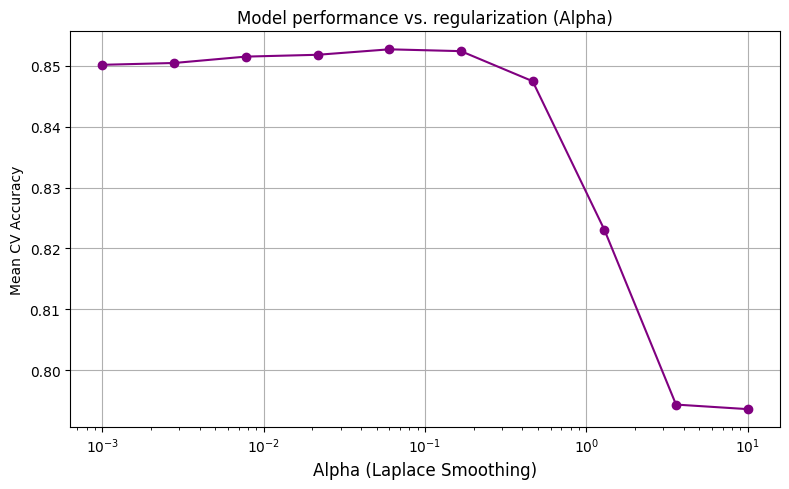

In [53]:
# extract mean accuracy from grid search results
scores = np.array(nb_grid_model.cv_results_['mean_test_score'])
alpha_values = nb_grid_model.cv_results_['param_alpha'].data  # extract alpha values used in GridSearchCV

# plot
plt.figure(figsize=(8, 5))
plt.semilogx(alpha_values, scores, '-o', label='CV Accuracy', color='purple')
plt.xlabel('Alpha (Laplace Smoothing)', fontsize=12)
plt.ylabel('Mean CV Accuracy')
plt.title('Model performance vs. regularization (Alpha)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 💡 **Conclusions**

> The model performance changes depending on alpha. The best accuracy is reached with around 0.1. As alpha increases, accuracy starts to drop (especially after 1). In this case light smoothing works best, while too much smoothing hurts performance.


#### 📈 Plot Accuracy evolution

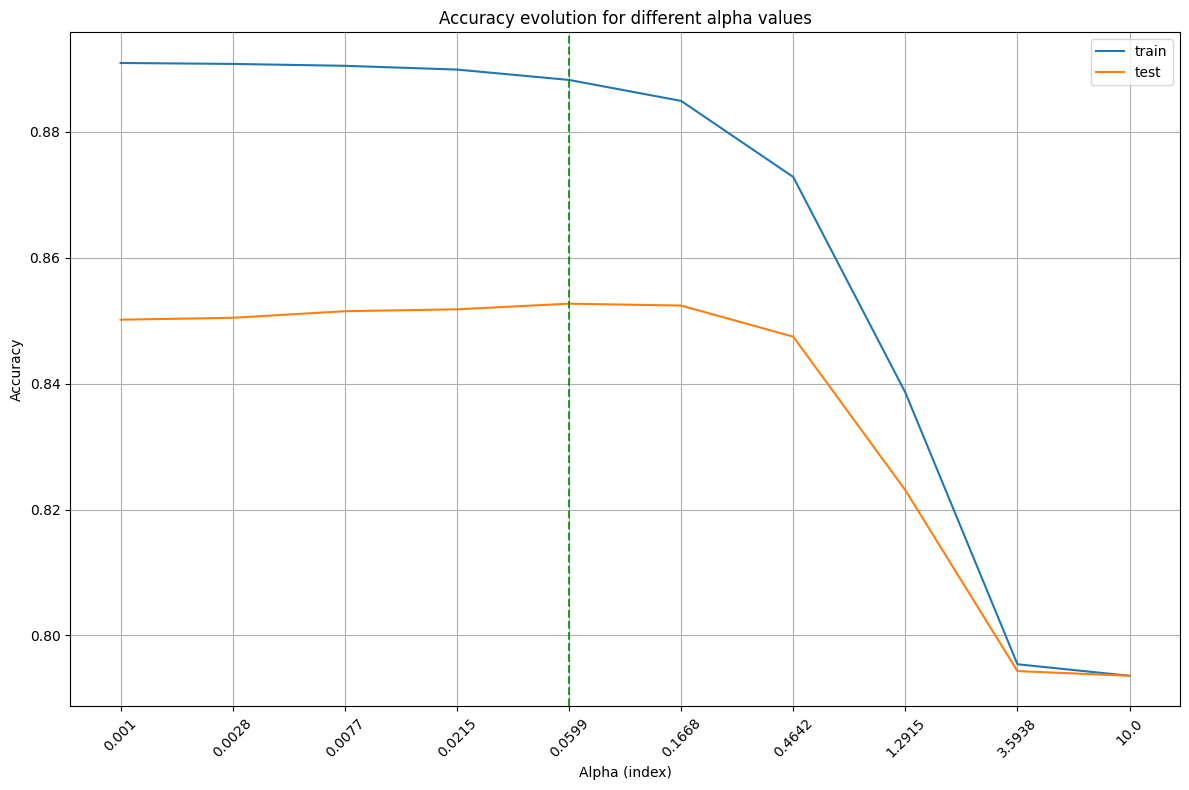

In [54]:
# get train and test scores
train_acc = nb_grid_model.cv_results_['mean_train_score']
test_acc = nb_grid_model.cv_results_['mean_test_score']
alpha_values = nb_grid_model.cv_results_['param_alpha'].data

# plot
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)

plt.title('Accuracy evolution for different alpha values')
plt.xlabel('Alpha (index)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# use alpha values as x-ticks
plt.xticks(ticks=range(len(alpha_values)), labels=np.round(alpha_values, 4), rotation=45)

plt.tight_layout()
plt.show()

##### 💡 **Conclusions**

> The plot shows how accuracy changes for different alpha values. When alpha is small, close to 0, train and test accuracy are stable and high, so the model is learning, but as alpha increases and specially after 1, test drop significantly.

> When the model becomes too smooth and starts underfitting. So the best performance is clearly achieved with low alpha values.

#### 📉 Plot Precision and Recall Scores

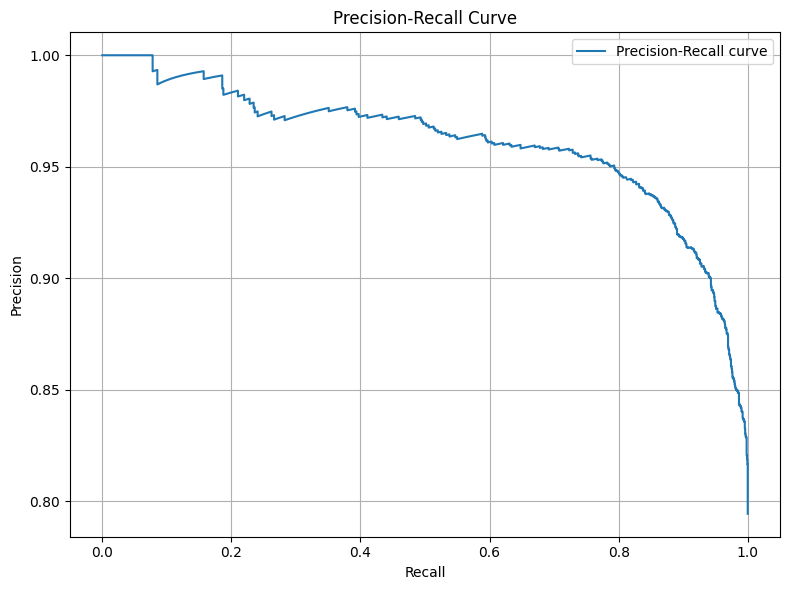

In [55]:
# get the best model
best_model1 = nb_grid_model.best_estimator_

# get prediction probabilities for the positive class
y_scores1 = best_model1.predict_proba(X_software_test_tfidf)[:, 1]

# compute precision-recall curve
p1, r1, thresholds1 = precision_recall_curve(y_software_test, y_scores1)

# plot the curve
plt.figure(figsize=(8, 6))
plt.plot(r1, p1, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

##### 💡 **Conclusions**

> The curve shows that the model maintains high precision across most of the recall range. It starts with perfect precision and slowly decreases as recall increases. The drop becomes more noticeable when recall gets closer to 1.

> The model seems confident when predicting positives and keeps a good balance between precision and recall.



#### 📈 Precision and Recall Scores as a function of the decisino threshold

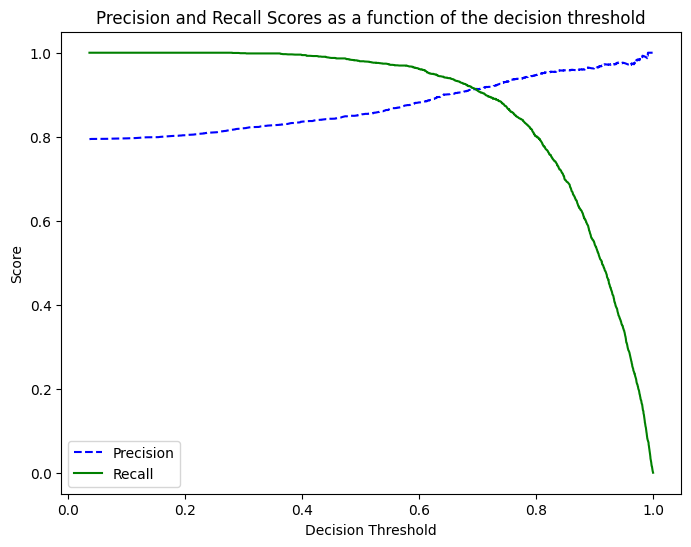

In [56]:
plot_precision_recall_vs_threshold(p1, r1, thresholds1)

##### 💡 **Conclusions**

> he model tends to be very good when predicting positives, especially with low thresholds. That explains why it has such high recall, but also why we saw it struggling with negatives in the test results. As the threshold increases, precision improves, but the model starts missing more positives.



#### 🎯 Predict

In [57]:
# test on 5 random samples
for i in random.sample(range(0, len(df_software_test)), 5):
    print(f'\n🔎 Review #{i}')
    predict_review_sentiment(i, df_software_test, nb_grid_model.best_estimator_, tfidf_vectorizer)



🔎 Review #1138
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #983
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #271
Actual sentiment: 0 (negative)
Predicted sentiment: 0 (negative)

🔎 Review #1920
Actual sentiment: 1 (positive)
Predicted sentiment: 1 (positive)

🔎 Review #516
Actual sentiment: 0 (negative)
Predicted sentiment: 0 (negative)


### Comparing both models

##### **Final comparison**

> After testing both models with GridSearchCV, I'd say that Logistic Regression performs more balanced overall. It handles both classes better (especially the positive ones) with a decent trade-off between precision and recall. MultinomialNB is fast and performs also well on positives, but completely drops on negatives (recall around 0.35), which for this use case makes it less reliable.

> Even though both have similar accuracy (around 0.85), the confusion matrix and the detailed metrics show that Logistic Regression is more consistent and not as biased toward the majority class. So if I had to pick one model, I'd go with Logistic Regression one.
